In [8]:
from io import StringIO
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
os.chdir("C:/Users/Martin Hackmann/Documents/GitHub/research")

In [31]:
data = pd.read_csv("data_all.csv")

# Create interaction terms for exposure with year (normalizing 1993 to 0)
for year in data['jahr'].unique():
    data[f'interaction_{year}'] = (data['jahr'] == year).astype(int) * data['exposure']

# Filter data for the specified years
data_1980_2004 = data[(data['jahr'] >= 1985) & (data['jahr'] <= 2004)]

# Define a formula for the specified regression
formula_1980_2004 = f"out_ue ~ IAB_ALQ  + C(jahr) + C(ao_kreis) + {' + '.join([f'interaction_{year}' for year in range(1985, 2005)])}"

# Run the regression for the specified period
model_1980_2004 = smf.ols(formula=formula_1980_2004, data=data_1980_2004).fit()

# Extract coefficients for interaction terms for the specified period
interaction_coeffs_1980_2004 = model_1980_2004.params[[f'interaction_{year}' for year in range(1985, 2005)]]



'UE_LMS90.png'

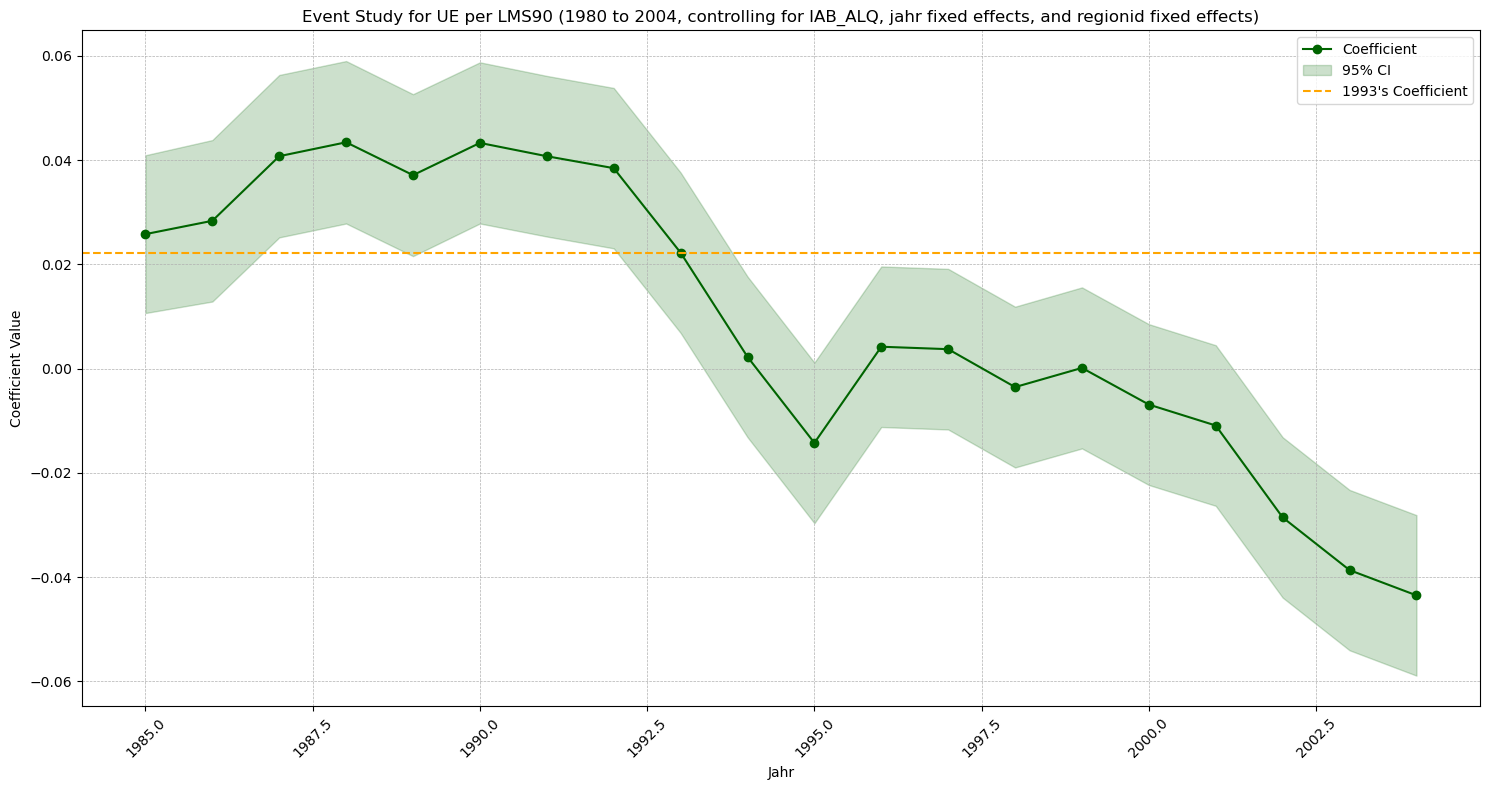

In [32]:
save_path = "UE_LMS90.png"


# Plotting the coefficients for the specified period with a horizontal line through the 1993 coefficient
plt.figure(figsize=(15, 8))
plt.plot(range(1985, 2005), interaction_coeffs_1980_2004, 'o-', label='Coefficient', color='darkgreen')
plt.fill_between(range(1985, 2005), 
                 interaction_coeffs_1980_2004 - 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 interaction_coeffs_1980_2004 + 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 color='darkgreen', alpha=0.2, label='95% CI')

# Adding a horizontal line for the 1993 coefficient
plt.axhline(y=interaction_coeffs_1980_2004['interaction_1993'], color='orange', linestyle='--', label="1993's Coefficient")

plt.title('Event Study for UE per LMS90 (1980 to 2004, controlling for IAB_ALQ, jahr fixed effects, and regionid fixed effects)')
plt.ylabel('Coefficient Value')
plt.xlabel('Jahr')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(save_path)

# Return the save path to the user
save_path


Now UE per elderly

In [28]:
# Load the dataset again
data = pd.read_csv("data_all.csv")

# Create interaction terms for exposure with year (normalizing 1993 to 0)
for year in data['jahr'].unique():
    data[f'interaction_{year}'] = (data['jahr'] == year).astype(int) * data['exposure']

# Filter data for the specified years
data_1980_2004 = data[(data['jahr'] >= 1985) & (data['jahr'] <= 2004)]

# Define a formula for the specified regression
formula_1980_2004 = f"out_ue2 ~ IAB_ALQ  + C(jahr) + C(ao_kreis) + {' + '.join([f'interaction_{year}' for year in range(1985, 2005)])}"

# Run the regression for the specified period
model_1980_2004 = smf.ols(formula=formula_1980_2004, data=data_1980_2004).fit()

# Extract coefficients for interaction terms for the specified period
interaction_coeffs_1980_2004 = model_1980_2004.params[[f'interaction_{year}' for year in range(1985, 2005)]]

'UE_elderly.png'

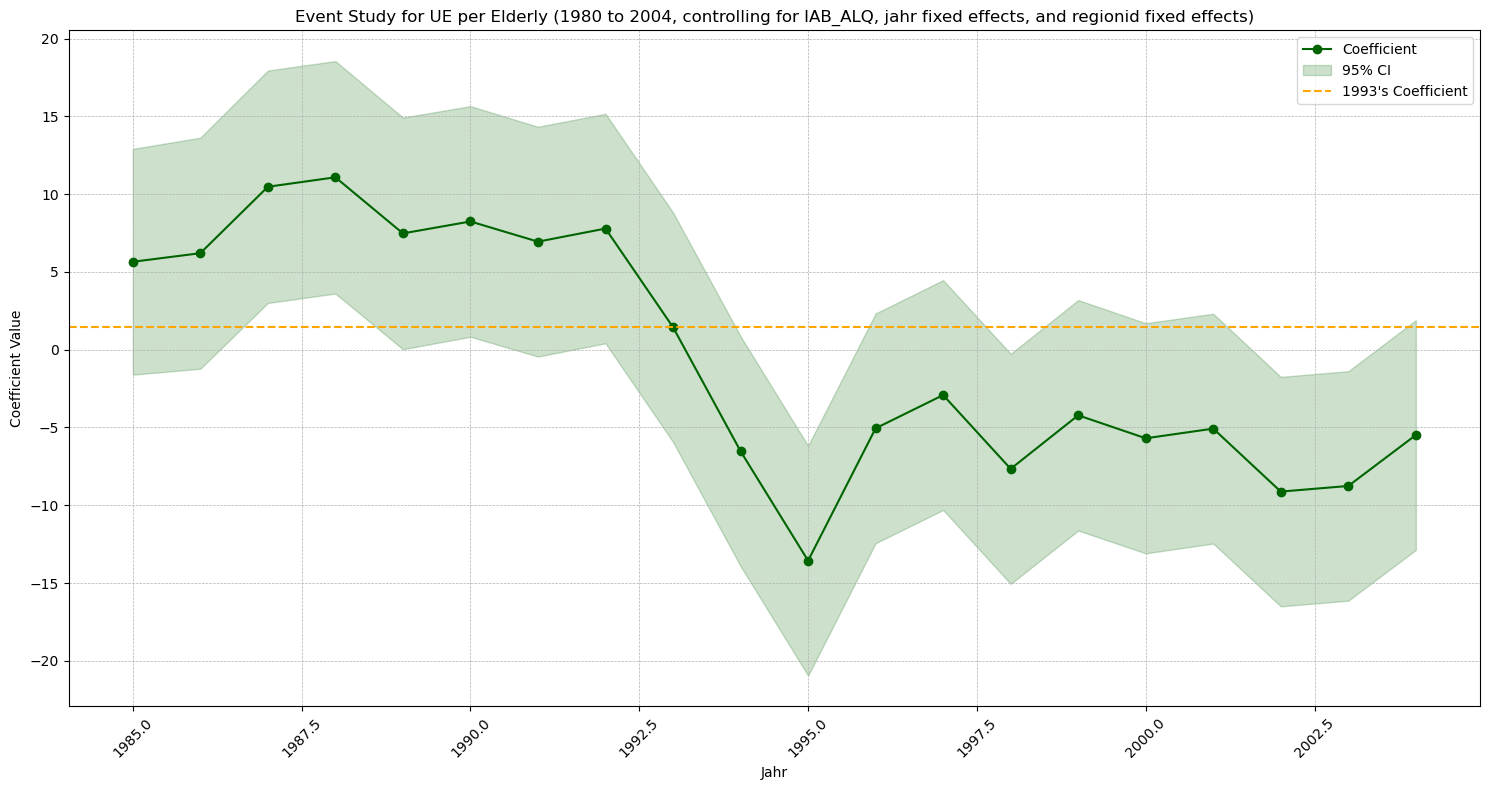

In [29]:
save_path = "UE_elderly.png"


# Plotting the coefficients for the specified period with a horizontal line through the 1993 coefficient
plt.figure(figsize=(15, 8))
plt.plot(range(1985, 2005), interaction_coeffs_1980_2004, 'o-', label='Coefficient', color='darkgreen')
plt.fill_between(range(1985, 2005), 
                 interaction_coeffs_1980_2004 - 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 interaction_coeffs_1980_2004 + 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 color='darkgreen', alpha=0.2, label='95% CI')

# Adding a horizontal line for the 1993 coefficient
plt.axhline(y=interaction_coeffs_1980_2004['interaction_1993'], color='orange', linestyle='--', label="1993's Coefficient")

plt.title('Event Study for UE per Elderly (1985 to 2004, controlling for IAB_ALQ, jahr fixed effects, and regionid fixed effects)')
plt.ylabel('Coefficient Value')
plt.xlabel('Jahr')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(save_path)

# Return the save path to the user
save_path


NO control for interactions of UE in 1989 by jahr

In [35]:
# Load the dataset again
data = pd.read_csv("data_all.csv")

# Create interaction terms for exposure with year (normalizing 1993 to 0)
for year in data['jahr'].unique():
    data[f'interaction_{year}'] = (data['jahr'] == year).astype(int) * data['exposure']

for year in data['jahr'].unique():
    data[f'interaction_extra_{year}'] = (data['jahr'] == year).astype(int) * data['IAB_ALQ1989max']

# Filter data for the specified years
data_1980_2004 = data[(data['jahr'] >= 1980) & (data['jahr'] <= 2004)]

# Define a formula for the specified regression
formula_1980_2004 = f"out_ue2 ~ IAB_ALQ  + C(jahr) + C(ao_kreis) + {' + '.join([f'interaction_{year}' for year in range(1980, 2005)])}"

# Run the regression for the specified period
model_1980_2004 = smf.ols(formula=formula_1980_2004, data=data_1980_2004).fit()

# Extract coefficients for interaction terms for the specified period
interaction_coeffs_1980_2004 = model_1980_2004.params[[f'interaction_{year}' for year in range(1980, 2005)]]

'UE_LMS90_1989UItrends.png'

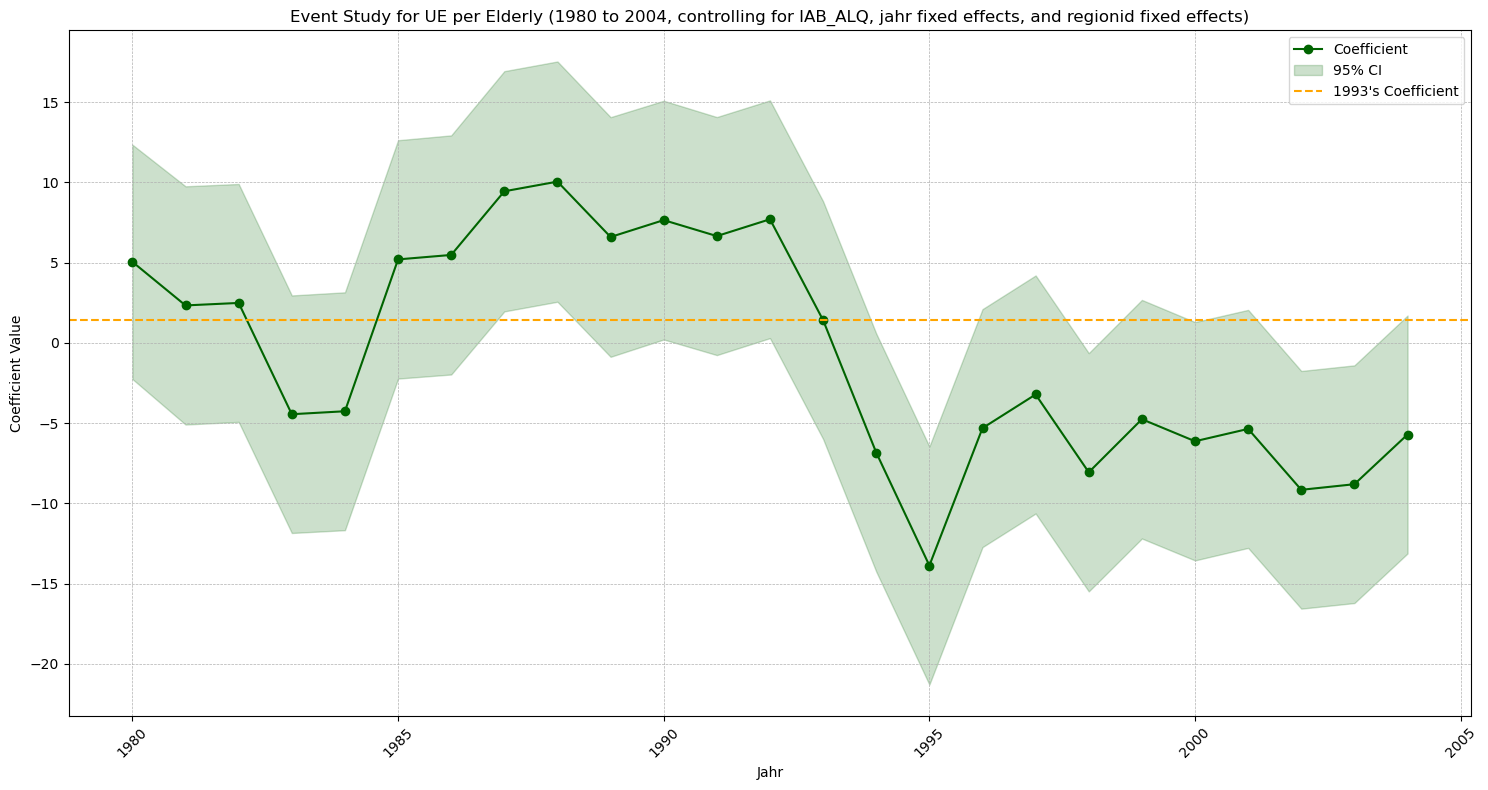

In [36]:
save_path = "UE_LMS90_1989UItrends.png"


# Plotting the coefficients for the specified period with a horizontal line through the 1993 coefficient
plt.figure(figsize=(15, 8))
plt.plot(range(1980, 2005), interaction_coeffs_1980_2004, 'o-', label='Coefficient', color='darkgreen')
plt.fill_between(range(1980, 2005), 
                 interaction_coeffs_1980_2004 - 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 interaction_coeffs_1980_2004 + 1.96*model_1980_2004.bse[interaction_coeffs_1980_2004.index], 
                 color='darkgreen', alpha=0.2, label='95% CI')

# Adding a horizontal line for the 1993 coefficient
plt.axhline(y=interaction_coeffs_1980_2004['interaction_1993'], color='orange', linestyle='--', label="1993's Coefficient")

plt.title('Event Study for UE per Elderly (1980 to 2004, controlling for IAB_ALQ in 1989 interacted with jahr FE, jahr fixed effects, and regionid fixed effects)')
plt.ylabel('Coefficient Value')
plt.xlabel('Jahr')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig(save_path)

# Return the save path to the user
save_path
